In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

C:\Users\gnssl\anaconda3\envs\myvenv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale


import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("./cic-ids_smote_pca.csv")
#df = pd.read_csv("/Users/anchanghun/Downloads/CIC-Dataset/cleaned_improved_cicids2017.csv")

In [4]:
df.head()

PC1       PC2        PC3       PC4       PC5       PC6       PC7  \
0  3.232792 -0.271886   1.515894 -3.818552  5.182663  6.760860 -1.311912   
1  3.769222 -2.014106  -3.404411 -0.515073  2.922303 -1.841594  0.208228   
2  7.703450 -2.329166  17.278404 -4.858516  4.896627  0.118813  2.789220   
3  4.628334 -0.569625  -1.205968 -2.189074  4.635424  0.336644 -2.182424   
4  4.703854 -0.543038  -1.235873 -2.148174  4.579692  0.351267 -2.020320   

         PC8       PC9       PC10  ...      PC17      PC18      PC19  \
0   1.596977  0.004107  -7.906217  ... -5.705622  0.547167 -0.496807   
1  -1.977385 -0.001916  -2.015464  ...  0.188947  0.250724  0.103865   
2  12.137316  0.315156 -15.275651  ... -8.236955 -2.851354 -1.004963   
3  -2.551760  0.171722  -5.415434  ...  2.811770  5.480001 -0.139221   
4  -2.645273 -0.095454  -5.816687  ...  2.903491  5.221990  0.149290   

       PC20      PC21      PC22      PC23       PC24      PC25  label  
0  1.131965 -1.633816  0.681364 -0.615970  -3.461492  2.742365      0  
1 -0.129173  0.831021 -0.293214  0.104955   0.056626 -0.246924      0  
2  8.097928  3.861185 -2.929637  5.653511 -11.473058 -1.286799      0  
3 -0.256047  0.822235  0.498247 -2.373457  -0.174230 -0.519110      0  
4 -0.171602  0.858253  0.490443 -2.365936  -0.153188 -0.526915      0  

[5 rows x 26 columns]

In [6]:
df['label'].value_counts()

label
0    1594540
6     797270
8     797270
5     797270
4     797270
3     797270
2     797270
7     797270
1     797270
Name: count, dtype: int64

In [7]:
len(df.columns)

26

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.1, random_state=42)
X_train.shape, X_test.shape

((7175430, 26), (797270, 26))

In [10]:
X_train_normal = X_train[X_train['label'] == 0]
X_train_normal.shape

(1434852, 26)

In [11]:
X_test.shape

(797270, 26)

In [12]:
y_test = X_test['label']
X_test = X_test.drop(labels='label',axis=1)

In [13]:
y_train_normal = X_train_normal['label']
X_train_normal = X_train_normal.drop(labels='label', axis=1)

In [14]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector, Conv1D, Conv1DTranspose
from keras.models import Model
from keras import regularizers
from keras_self_attention import SeqWeightedAttention, SeqSelfAttention
from keras.callbacks import EarlyStopping

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Model, Input
import numpy as np
from tensorflow.keras import backend as K
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# ‚úÖ ÌÅ¥ÎûòÏä§ Í∞úÏàò ÏÑ§Ï†ï (Ï¥ù 9Í∞ú: Ï†ïÏÉÅ + 8Í∞ú Í≥µÍ≤©)
num_classes = 9

# ‚úÖ Ïû†Ïû¨ Ï∞®Ïõê Î∞è Ï§ëÍ∞Ñ Ï∞®Ïõê ÏÑ§Ï†ï
latent_dim = 10
inter_dim = 20

# ‚úÖ ÏÉòÌîåÎßÅ Ìï®Ïàò (Ïû¨Îß§Í∞úÎ≥ÄÏàòÌôî Ìä∏Î¶≠ ÏÇ¨Ïö©) -> ÏïàÏ†ïÏ†ÅÏù∏ ÏÉòÌîåÎßÅ Ï†ÅÏö©
def sampling(args):
    z_mean, z_log_sigma = args
    batch_size = tf.shape(z_mean)[0]
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
    return z_mean + K.exp(0.5 * K.clip(z_log_sigma, -10, 10)) * epsilon  # NaN Î∞©ÏßÄ

# ‚úÖ ÏïàÏ†ïÏ†ÅÏù∏ VAE ÏÜêÏã§ Ìï®Ïàò (NaN Î∞©ÏßÄ)
def vae_loss(x, x_decoded_mean, z_mean, z_log_sigma):
    reconstruction_loss = K.mean(K.square(x - x_decoded_mean) + 1e-10)  # NaN Î∞©ÏßÄ
    kl_loss = -0.5 * K.sum(1 + K.clip(z_log_sigma, -10, 10) - K.square(z_mean) - K.exp(K.clip(z_log_sigma, -10, 10)), axis=-1)  # ÏïàÏ†ïÌôî
    kl_loss_weighted = kl_loss * 0.0001  # KL ÏÜêÏã§ Í∞ÄÏ§ëÏπò Ï†ÅÏö©
    total_loss = K.mean(reconstruction_loss + kl_loss_weighted)
    return total_loss

# ‚úÖ CNN-Based CVAE Î™®Îç∏ Ï†ïÏùò
def cvae(X):
    features = X.shape[1]  # ÌäπÏßï Ïàò
    input_x = Input(shape=(features,), name='InputFeatures')  

    # CNN Í∏∞Î∞ò Ïù∏ÏΩîÎçî
    reshaped_input = layers.Reshape((features, 1))(input_x)  # 1D Conv ÏÇ¨Ïö©ÏùÑ ÏúÑÌïú Ï∞®Ïõê Î≥ÄÌôò
    h = layers.Conv1D(filters=64, kernel_size=3, activation="relu", padding='same')(reshaped_input)
    h = layers.Conv1D(filters=32, kernel_size=3, activation="relu", padding='same')(h)
    h = layers.Conv1D(filters=16, kernel_size=3, activation="relu", padding='same')(h)
    h = layers.Flatten()(h)
    h = layers.Dense(inter_dim, activation='relu')(h)

    # Ïû†Ïû¨ Í≥µÍ∞Ñ
    z_mean = layers.Dense(latent_dim, name='z_mean')(h)
    z_log_sigma = layers.Dense(latent_dim, name='z_log_sigma')(h)
    z = layers.Lambda(sampling, name='z')([z_mean, z_log_sigma])

    # ÎîîÏΩîÎçî
    decoder1 = layers.Dense(features * inter_dim)(z)
    decoder1 = layers.Reshape((features, inter_dim))(decoder1)
    decoder1 = layers.Conv1DTranspose(filters=16, kernel_size=3, activation="relu", padding='same')(decoder1)
    decoder1 = layers.Conv1DTranspose(filters=32, kernel_size=3, activation="relu", padding='same')(decoder1)
    decoder1 = layers.Conv1DTranspose(filters=64, kernel_size=3, activation="relu", padding='same')(decoder1)
    decoder1 = layers.Flatten()(decoder1)
    decoder1 = layers.Dense(features, activation='sigmoid')(decoder1)  # ÏµúÏ¢Ö Î≥µÏõê

    model = Model(input_x, decoder1)
    model.add_loss(vae_loss(input_x, decoder1, z_mean, z_log_sigma))

    return model

# ‚úÖ Ï†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Îßå ÌïôÏäµ
model = cvae(X_train_normal)  # Ï†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Î°úÎßå ÌïôÏäµ
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train_normal, X_train_normal,
                    shuffle=True, epochs=50, validation_split=0.1, batch_size=32,
                    callbacks=[early_stopping])



Epoch 1/50
40356/40356 [==============================] - 165s 4ms/step - loss: 5.5249 - accuracy: 0.8506 - val_loss: 5.1532 - val_accuracy: 0.8828
Epoch 2/50
40356/40356 [==============================] - 162s 4ms/step - loss: 5.4925 - accuracy: 0.8812 - val_loss: 5.1503 - val_accuracy: 0.8828
Epoch 3/50
40356/40356 [==============================] - 161s 4ms/step - loss: 5.4786 - accuracy: 0.8922 - val_loss: 5.1318 - val_accuracy: 0.9072
Epoch 4/50
40356/40356 [==============================] - 160s 4ms/step - loss: 5.4728 - accuracy: 0.8982 - val_loss: 5.1299 - val_accuracy: 0.9002
Epoch 5/50
40356/40356 [==============================] - 161s 4ms/step - loss: 5.4718 - accuracy: 0.8956 - val_loss: 5.1270 - val_accuracy: 0.9001
Epoch 6/50
40356/40356 [==============================] - 160s 4ms/step - loss: 5.4700 - accuracy: 0.8940 - val_loss: 5.1299 - val_accuracy: 0.8976
Epoch 7/50
40356/40356 [==============================] - 159s 4ms/step - loss: 5.4701 - accuracy: 0.8942 - val_

In [18]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_shapes.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [25]:
# ‚úÖ X_test Îç∞Ïù¥ÌÑ∞Î°ú CVAE Î≥µÏõê ÏòàÏ∏° ÏàòÌñâ
X_pred = model.predict(X_test)

# ‚úÖ Î≥µÏõê Ïò§Î•ò (MSE) Í≥ÑÏÇ∞
reconstruction_errors = np.mean(np.square(X_test - X_pred), axis=1)

# ‚úÖ error_df ÏÉùÏÑ± (Ïã§Ï†ú ÎùºÎ≤® Ìè¨Ìï®)
error_df = pd.DataFrame({
    'reconstruction_error': reconstruction_errors,
    'true_class': y_test  # Ïã§Ï†ú ÎùºÎ≤® (0: Ï†ïÏÉÅ, 1~8: Í≥µÍ≤©)
})

# ‚úÖ IQR Í∏∞Î∞ò Threshold ÏÑ§Ï†ï (Ïù¥ÏÉÅ ÌÉêÏßÄÎ•º ÏúÑÌïú ÏûÑÍ≥ÑÍ∞í Í≤∞Ï†ï)
Q1 = np.percentile(error_df['reconstruction_error'], 25)
Q3 = np.percentile(error_df['reconstruction_error'], 75)
IQR = Q3 - Q1
threshold = Q3 + 1.5 * IQR  # ÏùºÎ∞òÏ†ÅÏù∏ Ïù¥ÏÉÅ ÌÉêÏßÄ Í∏∞Ï§Ä

# ‚úÖ Threshold Í∏∞Î∞ò Î∂ÑÎ•ò (Ï†ïÏÉÅ: 0, Ïù¥ÏÉÅ: 1)
error_df['pred_class'] = (error_df['reconstruction_error'] > threshold).astype(int)



24915/24915 [==============================] - 34s 1ms/step


In [26]:
from sklearn.metrics import confusion_matrix, classification_report

# ‚úÖ Confusion Matrix Ï∂úÎ†•
cm = confusion_matrix(error_df['true_class'] > 0, error_df['pred_class'])  # Ï†ïÏÉÅ vs Í≥µÍ≤©
print("Confusion Matrix:\n", cm)

# ‚úÖ Classification Report Ï∂úÎ†•
print("Classification Report:\n", classification_report(error_df['true_class'] > 0, error_df['pred_class']))

Confusion Matrix:
 [[151091   8597]
 [533766 103816]]
Classification Report:
               precision    recall  f1-score   support

       False       0.22      0.95      0.36    159688
        True       0.92      0.16      0.28    637582

    accuracy                           0.32    797270
   macro avg       0.57      0.55      0.32    797270
weighted avg       0.78      0.32      0.29    797270



In [27]:
error_df

reconstruction_error  true_class  pred_class
3878114              1.216826           3           0
4349081              4.015249           4           1
5385934              3.480534           5           1
554440               0.375023           0           0
6022218              0.746995           6           0
...                       ...         ...         ...
7646881              0.820406           8           0
6797076              0.632241           7           0
5968125              0.743748           6           0
1593454              1.016428           1           0
454359               1.976985           0           0

[797270 rows x 3 columns]

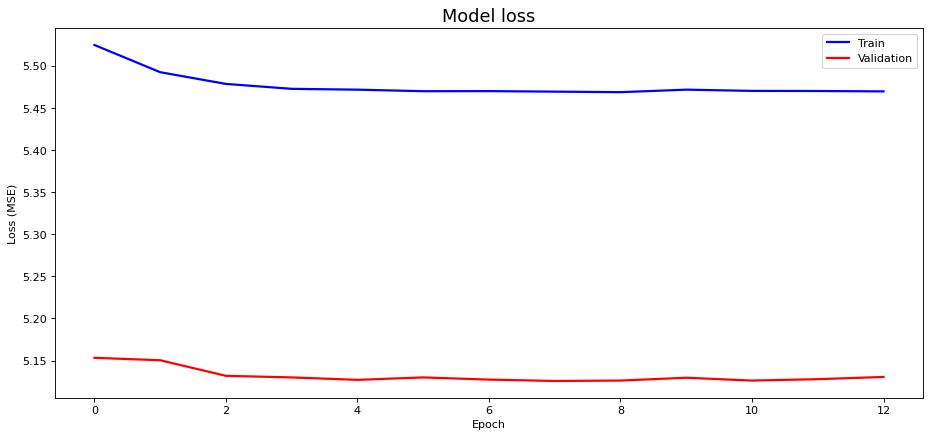

In [20]:
# Plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history.history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history.history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (MSE)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [30]:
import pandas as pd
import numpy as np

# ‚úÖ X_test Îç∞Ïù¥ÌÑ∞Î°ú CVAE Î≥µÏõê ÏòàÏ∏° ÏàòÌñâ
X_pred = model.predict(X_test)

# ‚úÖ Î≥µÏõê Ïò§Î•ò (MSE) Í≥ÑÏÇ∞
reconstruction_errors = np.mean(np.square(X_test - X_pred), axis=1)

# ‚úÖ error_df ÏÉùÏÑ± (Ïã§Ï†ú ÎùºÎ≤® Ìè¨Ìï®)
error_df = pd.DataFrame({
    'reconstruction_error': reconstruction_errors,
    'true_class': y_test  # 0 (Ï†ïÏÉÅ) ~ 8 (Í∞Å Í≥µÍ≤©)
})

# ‚úÖ ÌÅ¥ÎûòÏä§Î≥Ñ Threshold ÏÑ§Ï†ï (IQR Î∞©Ïãù)
thresholds = {}
for label in range(9):  # 0 (Ï†ïÏÉÅ) ~ 8 (Í∞Å Í≥µÍ≤©)
    class_errors = error_df[error_df['true_class'] == label]['reconstruction_error']
    Q1 = np.percentile(class_errors, 25)
    Q3 = np.percentile(class_errors, 75)
    IQR = Q3 - Q1
    thresholds[label] = Q3 + 1.5 * IQR  # Ïù¥ÏÉÅ ÌÉêÏßÄ Í∏∞Ï§Ä

# ‚úÖ Threshold Í∏∞Î∞ò Í≥µÍ≤© Î∂ÑÎ•ò (ÏµúÏÜå Ï∞®Ïù¥ Í∏∞Ï§Ä)
def classify_error(error_value):
    min_diff = float('inf')
    best_class = 0  # Í∏∞Î≥∏Í∞íÏùÄ Ï†ïÏÉÅ
    for cls, thresh in thresholds.items():
        diff = abs(error_value - thresh)
        if diff < min_diff:
            min_diff = diff
            best_class = cls
    return best_class

error_df['pred_class'] = error_df['reconstruction_error'].apply(classify_error)



24915/24915 [==============================] - 34s 1ms/step


ModuleNotFoundError: No module named 'ace_tools'

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

# ‚úÖ Confusion Matrix Ï∂úÎ†•
cm = confusion_matrix(error_df['true_class'], error_df['pred_class'])
print("Confusion Matrix:\n", cm)

# ‚úÖ Classification Report Ï∂úÎ†•
print("Classification Report:\n", classification_report(error_df['true_class'], error_df['pred_class']))

Confusion Matrix:
 [[ 2533  1045  1373 56816  2668  4131   927 43248 46947]
 [ 5722  2370  1745 23248     0     4  4041  8817 34102]
 [ 6753  1356  4380 13384  2429    69  1844 32036 17326]
 [ 1137   370   614 17151    33     0  3204  4743 51999]
 [ 7522  1761 43632  1025 10542  1714     0 13129    53]
 [27551  8974  3303  2755 19840  2414  1073  7582  6056]
 [    0     0     0     0     0     0 79737   378     0]
 [  237    44   182  2042   381   694  1813 68926  5542]
 [   20    22    22   108    11     0  6315   806 72499]]
Classification Report:
               precision    recall  f1-score   support

           0       0.05      0.02      0.02    159688
           1       0.15      0.03      0.05     80049
           2       0.08      0.06      0.06     79577
           3       0.15      0.22      0.18     79251
           4       0.29      0.13      0.18     79378
           5       0.27      0.03      0.05     79548
           6       0.81      1.00      0.89     80115
          

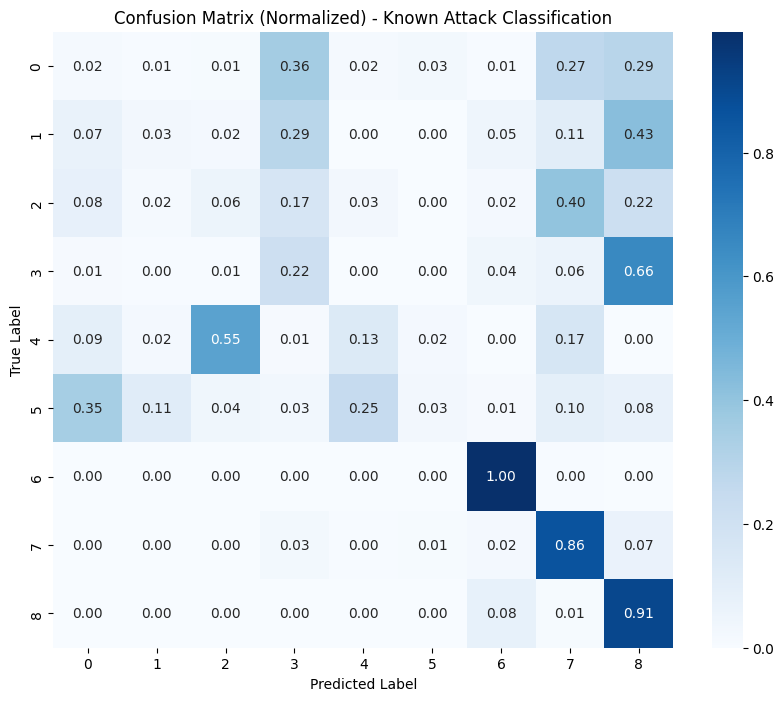

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ‚úÖ Ïã§Ï†ú ÎùºÎ≤®Í≥º ÏòàÏ∏° ÎùºÎ≤® Í∞ÄÏ†∏Ïò§Í∏∞
y_true = error_df['true_class'].values  # Ïã§Ï†ú ÎùºÎ≤®
y_pred = error_df['pred_class'].values  # ÏòàÏ∏° ÎùºÎ≤®

# ‚úÖ "Unknown" Í≥µÍ≤©ÏùÑ Ï†úÏô∏ÌïòÍ≥† Ï†ïÏÉÅ + 8Í∞ú Í≥µÍ≤©ÏúºÎ°ú ÌïÑÌÑ∞ÎßÅ
valid_classes = list(range(9))  # 0 (Ï†ïÏÉÅ) ~ 8 (Í≥µÍ≤© ÌÅ¥ÎûòÏä§)
mask = np.isin(y_true, valid_classes)  # Unknown Ï†úÏô∏
y_true_filtered = y_true[mask]
y_pred_filtered = y_pred[mask]

# ‚úÖ ÌòºÎèô ÌñâÎ†¨ Í≥ÑÏÇ∞
cm = confusion_matrix(y_true_filtered, y_pred_filtered, labels=valid_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Ï†ïÍ∑úÌôî

# ‚úÖ ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=valid_classes, yticklabels=valid_classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Normalized) - Known Attack Classification")
plt.show()

In [33]:
from scipy.stats import genpareto
import numpy as np

# ‚úÖ ÌÅ¥ÎûòÏä§Î≥Ñ reconstruction error Î∂ÑÌè¨ Î™®Îç∏ÎßÅ (EVT Ï†ÅÏö©)
thresholds = {}

for label in range(9):  # Ï†ïÏÉÅ(0) + Í≥µÍ≤©(1~8)
    class_errors = error_df[error_df['true_class'] == label]['reconstruction_error'].values
    
    if len(class_errors) > 10:  # ÏµúÏÜå ÏÉòÌîå Í∞úÏàò ÌôïÏù∏
        # ‚úÖ EVT Ï†ÅÏö© (Generalized Pareto Distribution - GPD)
        shape, loc, scale = genpareto.fit(class_errors)
        
        # ‚úÖ Threshold ÏÑ§Ï†ï (ÎÖºÎ¨∏ÏóêÏÑúÎäî ÌèâÍ∑† Ï¥àÍ≥º ÏûÑÍ≥óÍ∞í ÏÇ¨Ïö©)
        thresholds[label] = loc + (scale / (1 - shape))  # EVT ÏûÑÍ≥ÑÍ∞í Í≥ÑÏÇ∞
    else:
        thresholds[label] = np.percentile(class_errors, 95)  # ÏÉòÌîå Î∂ÄÏ°± Ïãú Percentile ÏÇ¨Ïö©

print("üìå EVT Í∏∞Î∞ò Threshold Í∞í:", thresholds)

üìå EVT Í∏∞Î∞ò Threshold Í∞í: {0: 1.8621835707030083, 1: 1.4000187676813989, 2: 1.405715821269161, 3: 1.1834192879863958, 4: 3.5352651078529522, 5: 3.629870447766578, 6: 0.5620732460805417, 7: -0.41018755959355935, 8: 0.7683521780682088}


In [35]:
# ‚úÖ EVT Í∏∞Î∞ò Î∂ÑÎ•ò Ìï®Ïàò
def classify_error_evt(error_value):
    min_diff = float('inf')
    best_class = 0  # Í∏∞Î≥∏Í∞í (Ï†ïÏÉÅ)
    
    for cls, thresh in thresholds.items():
        diff = abs(error_value - thresh)
        if diff < min_diff:
            min_diff = diff
            best_class = cls
            
    return best_class

# ‚úÖ error_dfÏóê ÏÉàÎ°úÏö¥ EVT Í∏∞Î∞ò ÏòàÏ∏° ÌÅ¥ÎûòÏä§ Ï∂îÍ∞Ä
error_df['pred_class_evt'] = error_df['reconstruction_error'].apply(classify_error_evt)


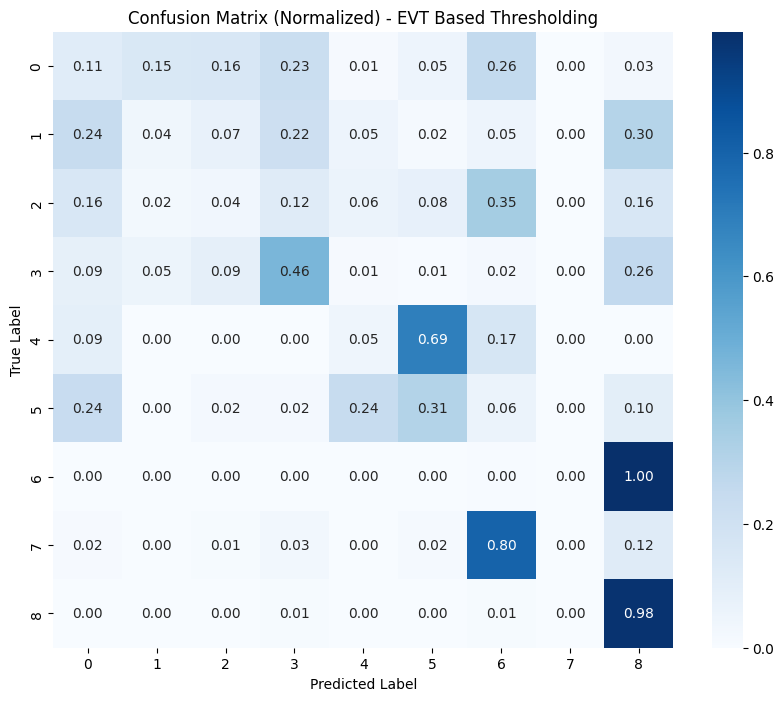

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ‚úÖ Ïã§Ï†ú ÎùºÎ≤®Í≥º EVT ÏòàÏ∏° ÎùºÎ≤® Í∞ÄÏ†∏Ïò§Í∏∞
y_true = error_df['true_class'].values
y_pred_evt = error_df['pred_class_evt'].values

# ‚úÖ ÌòºÎèô ÌñâÎ†¨ ÏÉùÏÑ±
cm = confusion_matrix(y_true, y_pred_evt, labels=list(range(9)))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Ï†ïÍ∑úÌôî

# ‚úÖ ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(range(9)), yticklabels=list(range(9)))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Normalized) - EVT Based Thresholding")
plt.show()

In [39]:
import numpy as np
import tensorflow.keras.backend as K
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# ‚úÖ Î™®Îç∏ÏóêÏÑú z_mean Ï∂îÏ∂ú Ìï®Ïàò Ï†ïÏùò
z_mean_layer = model.get_layer("z_mean")
z_mean_function = K.function([model.input], [z_mean_layer.output])

# ‚úÖ ÎØ∏ÎãàÎ∞∞Ïπò(batch)Î°ú z_mean Ï∂îÏ∂ú (OOM Î∞©ÏßÄ)
batch_size = 1024  # ‚úÖ Î©îÎ™®Î¶¨ Ï†àÏïΩÏùÑ ÏúÑÌï¥ ÏûëÏùÄ Î∞∞Ïπò ÌÅ¨Í∏∞ ÏÇ¨Ïö©
z_mean_list = []

for i in range(0, len(X_test), batch_size):
    batch = X_test[i:i+batch_size]
    z_mean_batch = z_mean_function([batch])[0]
    z_mean_list.append(z_mean_batch)

# ‚úÖ NumPy Î∞∞Ïó¥Î°ú Î≥ÄÌôò
z_mean_values = np.vstack(z_mean_list)

# ‚úÖ X_test ÌÅ¨Í∏∞ Ï§ÑÏù¥Í∏∞ (ÏµúÎåÄ 10,000Í∞ú ÏÉòÌîåÎßå ÏÇ¨Ïö©)
sample_size = min(10000, len(z_mean_values))  # 10,000Í∞ú Ïù¥ÌïòÎ°ú Ï†úÌïú
z_mean_sampled = z_mean_values[:sample_size]
y_test_sampled = y_test[:sample_size]

# ‚úÖ t-SNE Ï†ÅÏö© (X_test ÏÉòÌîå ÏàòÎ≥¥Îã§ perplexityÍ∞Ä ÏûëÏïÑÏïº Ìï®)
tsne = TSNE(n_components=2, perplexity=min(30, len(z_mean_sampled)-1), random_state=42)
z_tsne = tsne.fit_transform(z_mean_sampled)

# ‚úÖ t-SNE Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 7))
sns.scatterplot(x=z_tsne[:, 0], y=z_tsne[:, 1], hue=y_test_sampled, palette="deep")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("Latent Space Representation (t-SNE)")
plt.show()

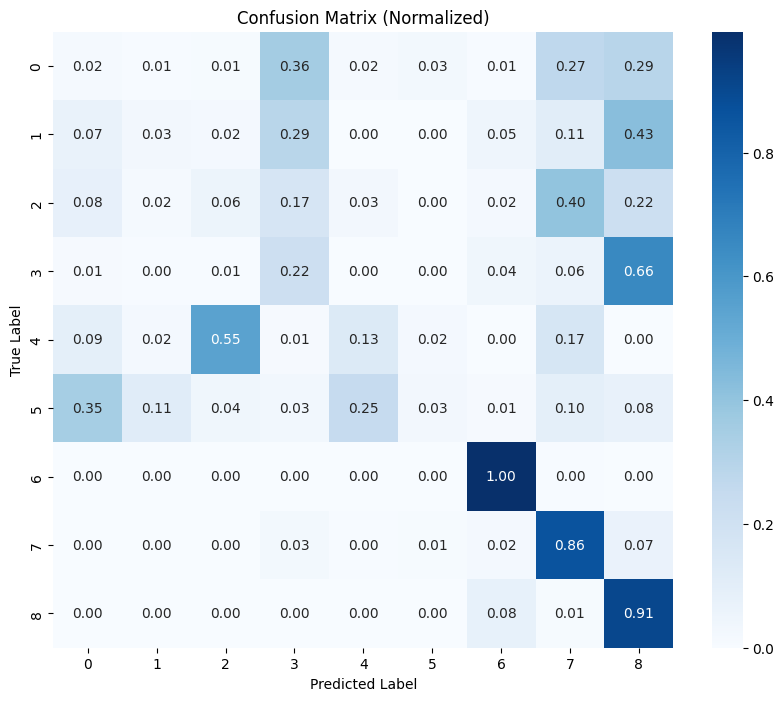

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ‚úÖ Ïã§Ï†ú ÎùºÎ≤®Í≥º ÏòàÏ∏° ÎùºÎ≤® Í∞ÄÏ†∏Ïò§Í∏∞
y_true = error_df['true_class'].values
y_pred = error_df['pred_class'].values

# ‚úÖ ÌòºÎèô ÌñâÎ†¨ ÏÉùÏÑ±
cm = confusion_matrix(y_true, y_pred, labels=list(range(9)))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Ï†ïÍ∑úÌôî

# ‚úÖ ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(range(9)), yticklabels=list(range(9)))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Normalized)")
plt.show()

In [41]:
from scipy.stats import genpareto
import numpy as np

thresholds = {}

for label in range(9):  # 0(Ï†ïÏÉÅ) + 8Í∞ú Í≥µÍ≤©
    class_errors = error_df[error_df['true_class'] == label]['reconstruction_error'].values
    
    if len(class_errors) > 10:  # ÏµúÏÜå ÏÉòÌîå Í∞úÏàò ÌôïÏù∏
        shape, loc, scale = genpareto.fit(class_errors)
        thresholds[label] = loc + (scale / (1 - shape))  # EVT Í∏∞Î∞ò threshold ÏÑ§Ï†ï
    else:
        thresholds[label] = np.percentile(class_errors, 95)  # Îç∞Ïù¥ÌÑ∞ Î∂ÄÏ°± Ïãú percentile Ï†ÅÏö©

print("üìå EVT Í∏∞Î∞ò Threshold Í∞í:", thresholds)

üìå EVT Í∏∞Î∞ò Threshold Í∞í: {0: 1.8621835707030083, 1: 1.4000187676813989, 2: 1.405715821269161, 3: 1.1834192879863958, 4: 3.5352651078529522, 5: 3.629870447766578, 6: 0.5620732460805417, 7: -0.41018755959355935, 8: 0.7683521780682088}


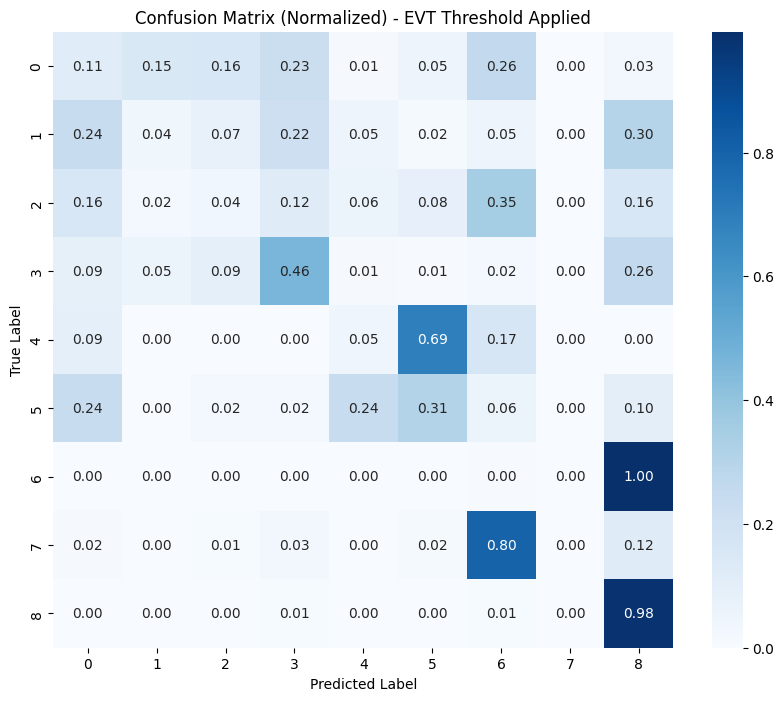

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ‚úÖ ÏÉàÎ°úÏö¥ EVT Í∏∞Î∞ò threshold Ï†ÅÏö© ÌõÑ ÏòàÏ∏° ÏàòÌñâ
error_df['pred_class_evt'] = error_df['reconstruction_error'].apply(lambda x: classify_error_evt(x))

# ‚úÖ Confusion Matrix ÏÉùÏÑ±
cm = confusion_matrix(error_df['true_class'], error_df['pred_class_evt'], labels=list(range(9)))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Ï†ïÍ∑úÌôî

# ‚úÖ Confusion Matrix ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(range(9)), yticklabels=list(range(9)))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Normalized) - EVT Threshold Applied")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


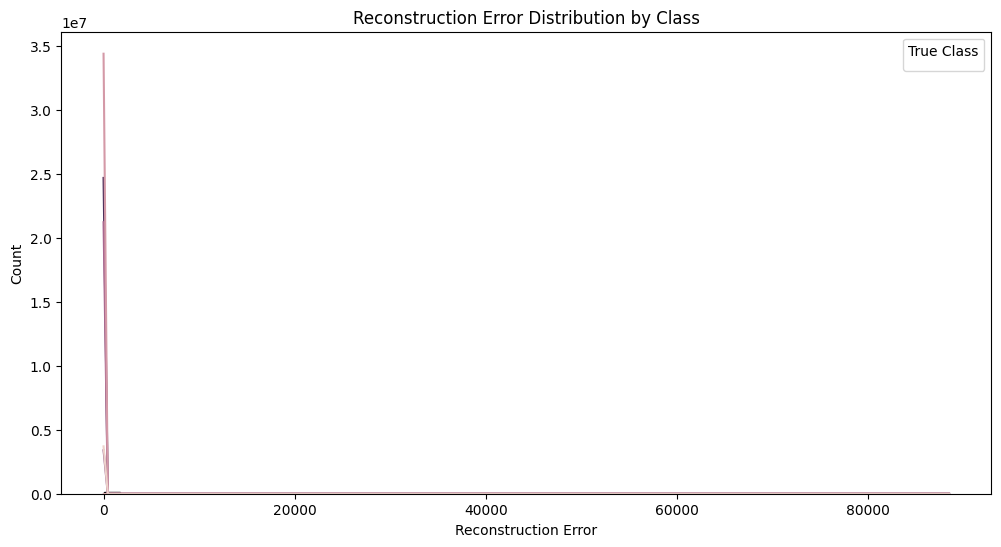

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(data=error_df, x="reconstruction_error", hue="true_class", bins=50, kde=True)
plt.xlabel("Reconstruction Error")
plt.ylabel("Count")
plt.title("Reconstruction Error Distribution by Class")
plt.legend(title="True Class")
plt.show()

In [44]:
thresholds = {}

for label in range(9):  # 0(Ï†ïÏÉÅ) + 8Í∞ú Í≥µÍ≤©
    class_errors = error_df[error_df['true_class'] == label]['reconstruction_error'].values
    
    if len(class_errors) > 10:  # ÏµúÏÜå ÏÉòÌîå Í∞úÏàò ÌôïÏù∏
        thresholds[label] = np.percentile(class_errors, 98)  # ÌÅ¥ÎûòÏä§Î≥Ñ ÏµúÏ†Å Percentile ÏÑ§Ï†ï
    else:
        thresholds[label] = np.percentile(error_df['reconstruction_error'], 98)  # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò ÏÑ§Ï†ï

print("üìå ÏÉàÎ°≠Í≤å Í≥ÑÏÇ∞Îêú Threshold Í∞í:", thresholds)

üìå ÏÉàÎ°≠Í≤å Í≥ÑÏÇ∞Îêú Threshold Í∞í: {0: 12.585542599994461, 1: 3.551054971210044, 2: 5.638153729181427, 3: 2.744527524871538, 4: 10.684967549214159, 5: 9.892977736119553, 6: 0.7573455928726317, 7: 2.303535604419556, 8: 0.8485700888034071}


In [45]:
def classify_error_dynamic(error_value):
    min_diff = float('inf')
    best_class = 0  # Í∏∞Î≥∏Í∞í (Ï†ïÏÉÅ)
    
    for cls, thresh in thresholds.items():
        diff = abs(error_value - thresh)
        if diff < min_diff:
            min_diff = diff
            best_class = cls
            
    return best_class

# ‚úÖ ÏÉàÎ°úÏö¥ Î∂ÑÎ•ò Ï†ÅÏö©
error_df['pred_class_dynamic'] = error_df['reconstruction_error'].apply(classify_error_dynamic)

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ‚úÖ ÏÉàÎ°úÏö¥ Î∂ÑÎ•ò Í≤∞Í≥º Í∏∞Î∞ò ÌòºÎèô ÌñâÎ†¨ ÏÉùÏÑ±
cm = confusion_matrix(error_df['true_class'], error_df['pred_class_dynamic'], labels=list(range(9)))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Ï†ïÍ∑úÌôî

# ‚úÖ ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(range(9)), yticklabels=list(range(9)))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Normalized) - Dynamic Threshold Applied")
plt.show()

In [47]:
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï§ÄÎπÑ
true_class = error_df['true_class'].astype(str)
reconstruction_error = error_df['reconstruction_error']

# Î∞ïÏä§ ÌîåÎ°Ø Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(8, 8))
plt.boxplot(
    [reconstruction_error[true_class == cls] for cls in sorted(true_class.unique())],
    labels=sorted(true_class.unique()),
    showfliers=False,
    vert=True,
    patch_artist=True
)

plt.ylabel('Distribution')
plt.xticks(rotation=90)
plt.show()


In [48]:
import numpy as np

thresholds = {}

for label in sorted(error_df['true_class'].unique()):  # 0(Ï†ïÏÉÅ) + 8Í∞ú Í≥µÍ≤©
    class_errors = error_df[error_df['true_class'] == label]['reconstruction_error'].values
    
    if len(class_errors) > 10:  # ÏµúÏÜå ÏÉòÌîå Í∞úÏàò ÌôïÏù∏
        thresholds[label] = np.percentile(class_errors, 98)  # ÌÅ¥ÎûòÏä§Î≥Ñ ÏµúÏ†Å Percentile ÏÑ§Ï†ï
    else:
        thresholds[label] = np.percentile(error_df['reconstruction_error'], 98)  # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò ÏÑ§Ï†ï

print("üìå ÏÉàÎ°≠Í≤å Í≥ÑÏÇ∞Îêú Threshold Í∞í:", thresholds)

üìå ÏÉàÎ°≠Í≤å Í≥ÑÏÇ∞Îêú Threshold Í∞í: {0: 12.585542599994461, 1: 3.551054971210044, 2: 5.638153729181427, 3: 2.744527524871538, 4: 10.684967549214159, 5: 9.892977736119553, 6: 0.7573455928726317, 7: 2.303535604419556, 8: 0.8485700888034071}


In [49]:
import numpy as np

# Reconstruction ErrorÍ∞Ä 0Î≥¥Îã§ ÏûëÏïÑÏßÄÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ ÏûëÏùÄ Í∞í Ï∂îÍ∞Ä
error_df["log_reconstruction_error"] = np.log1p(error_df["reconstruction_error"])

plt.figure(figsize=(12, 6))
plt.boxplot(
    [error_df["log_reconstruction_error"][error_df["true_class"] == cls] for cls in sorted(error_df["true_class"].unique())],
    labels=sorted(error_df["true_class"].unique()),
    showfliers=False,
    vert=True,
    patch_artist=True
)
plt.ylabel("Log Scaled Reconstruction Error")
plt.xticks(rotation=90)
plt.title("Reconstruction Error Distribution (Log Scaled)")
plt.show()

In [50]:
def classify_error_dynamic(error_value):
    min_diff = float("inf")
    best_class = 0  # Í∏∞Î≥∏Í∞í (Ï†ïÏÉÅ)
    
    for cls, thresh in thresholds.items():
        diff = abs(error_value - thresh)
        if diff < min_diff:
            min_diff = diff
            best_class = cls
            
    return best_class

# ‚úÖ ÏÉàÎ°úÏö¥ Î∂ÑÎ•ò Ï†ÅÏö©
error_df['pred_class_dynamic'] = error_df['reconstruction_error'].apply(classify_error_dynamic)

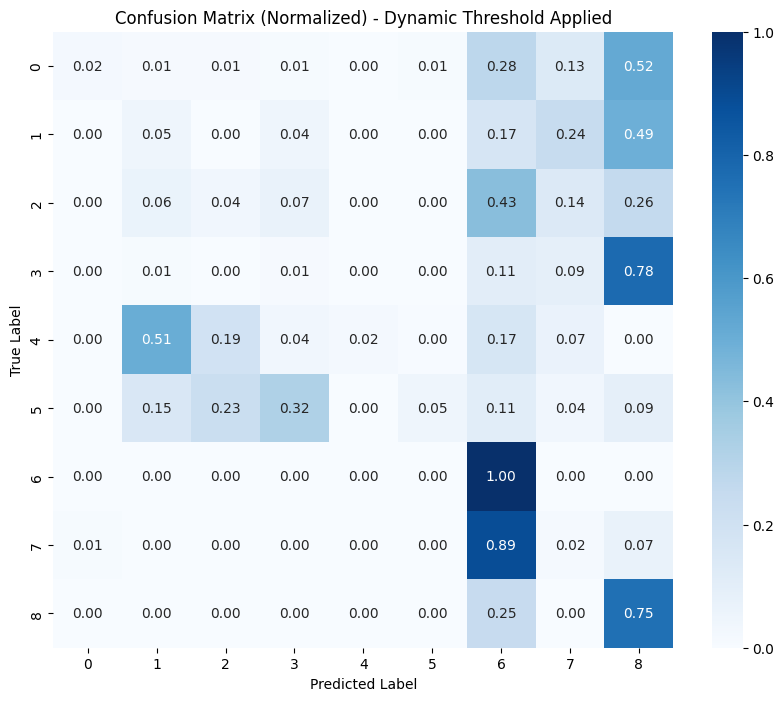

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ‚úÖ ÏÉàÎ°úÏö¥ Î∂ÑÎ•ò Í≤∞Í≥º Í∏∞Î∞ò ÌòºÎèô ÌñâÎ†¨ ÏÉùÏÑ±
cm = confusion_matrix(error_df['true_class'], error_df['pred_class_dynamic'], labels=sorted(error_df['true_class'].unique()))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Ï†ïÍ∑úÌôî

# ‚úÖ Confusion Matrix ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=sorted(error_df['true_class'].unique()), yticklabels=sorted(error_df['true_class'].unique()))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Normalized) - Dynamic Threshold Applied")
plt.show()

In [49]:


import numpy as np
from sklearn.metrics import f1_score

# Define the range of threshold values
threshold_range = np.arange(2590, 2650, 1)

# List to store F1 scores for each threshold
f1_scores = []

# Loop through each threshold and calculate F1 score
for threshold in threshold_range:
    y_pred = [0 if e < threshold else 1 for e in error_df.reconstruction_error.values]
    f1 = f1_score(error_df.true_class, y_pred)
    f1_scores.append(f1)

# Find the threshold with the highest F1 score
best_threshold = threshold_range[np.argmax(f1_scores)]
best_f1_score = max(f1_scores)

print(f"Best threshold: {best_threshold}")
print(f"Best F1 score: {best_f1_score}")

# Optionally, you can plot the F1 scores across the threshold range
plt.plot(threshold_range, f1_scores, marker='o')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.show()


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
# Í∑∏ÎûòÌîÑ Î≥¥Í≥† threshold Í≤∞Ï†ï 42.19124597192374
threshold = 2590

In [ ]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='^', ms=3.5, linestyle='',
            label= "Normal" if name == 0 else "Fall")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.set_ylim(0, 40)
ax.legend()
plt.title("Reconstruction ierror for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you have already defined LABELS, threshold, and y_pred

LABELS = ["Attack", "Normal"]

y_pred = [0 if e < threshold else 1 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

# Create the figure and axis
plt.figure(figsize=(12, 12))
fig, ax = plt.subplots()

# Plot the confusion matrix using imshow
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)

# Add color bar
plt.colorbar(cax)

# Set the labels for the axes
ax.set_xticks(np.arange(len(LABELS)))
ax.set_yticks(np.arange(len(LABELS)))

ax.set_xticklabels(LABELS)
ax.set_yticklabels(LABELS)

# Set labels and title
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix')

# Annotate the confusion matrix with the counts
for i in range(len(LABELS)):
    for j in range(len(LABELS)):
        ax.text(j, i, format(conf_matrix[i, j], 'd'),
                ha="center", va="center",
                color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

precision, recall, f1,_ = precision_recall_fscore_support(y_test,y_pred,average='binary')
print ('Accuracy Score :',accuracy_score(error_df.true_class, y_pred) )
print ('Precision :',precision )
print ('Recall :',recall )
print ('F1 :',f1 )

In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming y_test and reconstruction_error have been defined
fpr, tpr, thresholds = roc_curve(y_test, reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Extract the true labels and reconstruction errors from error_df
y_true = error_df['true_class']
y_scores = error_df['reconstruction_error']

# Compute the False Positive Rate (FPR) and True Positive Rate (TPR) for different thresholds
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

# Set plot labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Display the plot
plt.show()


In [ ]:
# If error_df.true_class is a nested structure, flatten it
y_test = error_df.true_class.apply(lambda x: int(x[0][0]) if isinstance(x, list) else int(x))

# Ensure y_pred is a list of integers
y_pred = [0 if e < threshold else 1 for e in error_df.reconstruction_error.values]

# Now calculate the metrics
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


In [ ]:
print(roc_auc)

34881/34881 [==============================] - 55s 2ms/step


/var/folders/lt/dt43ws7s4_z4rrsjwvzmwz740000gn/T/ipykernel_16133/3651740282.py:27: RuntimeWarning: invalid value encountered in divide
  sns.heatmap(cm / np.sum(cm, axis=1)[:, np.newaxis], annot=True, fmt=".2f", cmap="gray", xticklabels=labels, yticklabels=labels)


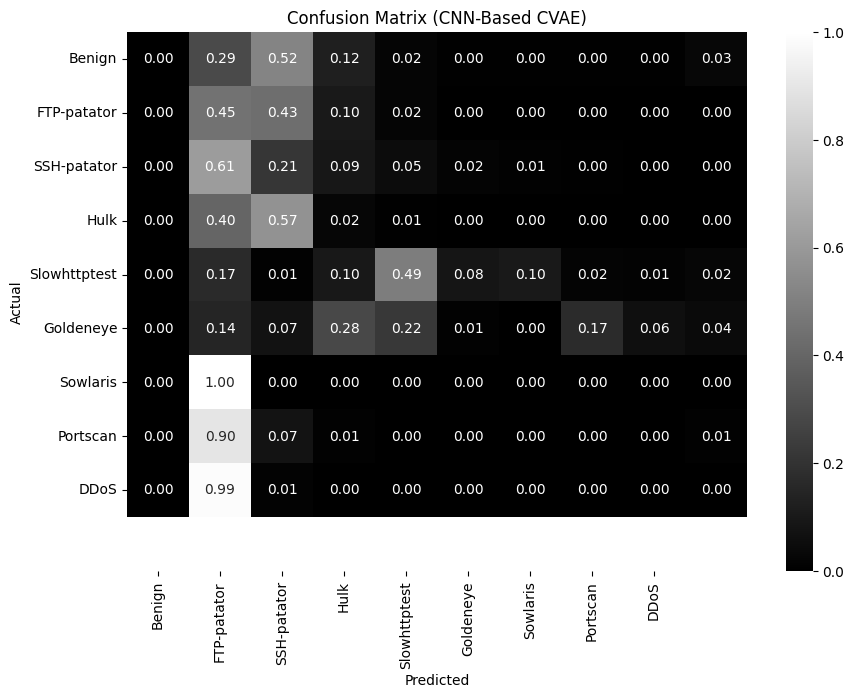

/opt/homebrew/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


üîπ Precision: 0.0970
üîπ Recall: 0.1267
üîπ F1-score: 0.0932


ValueError: Number of classes, 10, does not match size of target_names, 9. Try specifying the labels parameter

In [34]:
# ‚úÖ Training & Validation Loss Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history.get('val_loss', []), label='Validation Loss')  # NaN Î∞©ÏßÄ
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

# ‚úÖ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° Î∞è Ïû¨Íµ¨ÏÑ± Ïò§Î•ò Í≥ÑÏÇ∞
X_test_pred = model.predict(X_test)
reconstruction_errors = np.mean(np.square(X_test - X_test_pred), axis=1)  # MSE ÏÇ¨Ïö©

# ‚úÖ ÏûÑÍ≥ÑÍ∞í ÏÑ§Ï†ï (Ï†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Ïùò 95% Í∏∞Ï§Ä)
threshold = np.percentile(reconstruction_errors, 95)

# ‚úÖ Í≥µÍ≤© Ïú†ÌòïÎ≥ÑÎ°ú Î∂ÑÎ•ò (9Í∞ú ÌÅ¥ÎûòÏä§)
y_pred_labels = np.digitize(reconstruction_errors, bins=np.linspace(0, threshold * 1.5, num_classes))


# ‚úÖ ÌòºÎèô ÌñâÎ†¨ ÏÉùÏÑ± (9Í∞ú ÌÅ¥ÎûòÏä§ Í≥†Î†§)
cm = confusion_matrix(y_test, y_pred_labels)

labels = ["Benign", "FTP-patator", "SSH-patator", "Hulk", "Slowhttptest", "Goldeneye", "Sowlaris", "Portscan", "DDoS"]

plt.figure(figsize=(10, 7))
sns.heatmap(cm / np.sum(cm, axis=1)[:, np.newaxis], annot=True, fmt=".2f", cmap="gray", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (CNN-Based CVAE)")
plt.show()

# ‚úÖ Ï†ïÌôïÎèÑ, Ï†ïÎ∞ÄÎèÑ(Precision), Ïû¨ÌòÑÏú®(Recall), F1-score Í≥ÑÏÇ∞
precision = precision_score(y_test, y_pred_labels, average='weighted')
recall = recall_score(y_test, y_pred_labels, average='weighted')
f1 = f1_score(y_test, y_pred_labels, average='weighted')

print(f"üîπ Precision: {precision:.4f}")
print(f"üîπ Recall: {recall:.4f}")
print(f"üîπ F1-score: {f1:.4f}")

# ‚úÖ Classification Report Ï∂úÎ†•
print("\nüìå Classification Report:\n", classification_report(y_test, y_pred_labels, target_names=labels))